# Lab | Multi-modal output agent

**Create another version of the prompts below to query the dall-e vision AI model following the example shown in this notebook.**

# Multi-modal outputs: Image & Text

This notebook shows how non-text producing tools can be used to create multi-modal agents.

This example is limited to text and image outputs and uses UUIDs to transfer content across tools and agents. 

This example uses Steamship to generate and store generated images. Generated are auth protected by default. 

You can get your Steamship api key here: https://steamship.com/account/api

In [78]:
# !pip install steamship > /dev/null
# !pip install langchainhub

In [2]:
import re

from IPython.display import Image, display
from steamship import Block, Steamship

In [3]:
from langchain.agents import AgentType, initialize_agent
from langchain.agents import AgentExecutor, create_react_agent
from langchain_openai import OpenAI
from langchain import hub
from langchain.tools import SteamshipImageGenerationTool as OriginalSteamshipImageGenerationTool

In [5]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

OPENAI_API_KEY  = os.getenv('OPENAI_API_KEY')
STEAMSHIP_API_KEY = os.getenv('STEAMSHIP_API_KEY')

In [8]:
llm = OpenAI(temperature=0)

## Dall-E 

In [11]:
class SteamshipImageGenerationTool(OriginalSteamshipImageGenerationTool):
    pass
SteamshipImageGenerationTool.update_forward_refs()

In [13]:
tools = [SteamshipImageGenerationTool(model_name="dall-e")]

In [17]:
mrkl = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)

# prompt = hub.pull("hwchase17/react")
# agent = create_react_agent(llm=llm, tools=tools, prompt=prompt)
# agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [19]:
output = mrkl.invoke("How would you visualize a parot playing soccer?")



> Entering new AgentExecutor chain...
 I should use the generate_image tool to create an image of a parrot playing soccer.
Action: generate_image
Action Input: "A parrot wearing a soccer jersey, kicking a soccer ball on a green field with a soccer goal in the background."
Observation: 2E082018-EB59-4701-97B3-E717CD3A3CD5
Thought: I should use the UUID to retrieve the generated image.
Action: retrieve_image
Action Input: 2E082018-EB59-4701-97B3-E717CD3A3CD5
Observation: retrieve_image is not a valid tool, try one of [generate_image].
Thought: I should use the generate_image tool to create an image of a parrot playing soccer.
Action: generate_image
Action Input: "A parrot wearing a soccer jersey, kicking a soccer ball on a green field with a soccer goal in the background."
Observation: A3172ED1-7AB7-4952-9F65-B4C024FE0574
Thought: I should use the UUID to retrieve the generated image.
Action: retrieve_image
Action Input: A3172ED1-7AB7-4952-9F65-B4C024FE0574
Observation: retrieve_image 

In [21]:
def show_output(output):
    """Display the multi-modal output from the agent."""
    UUID_PATTERN = re.compile(
        r"([0-9A-Za-z]{8}-[0-9A-Za-z]{4}-[0-9A-Za-z]{4}-[0-9A-Za-z]{4}-[0-9A-Za-z]{12})"
    )

    outputs = UUID_PATTERN.split(output)
    outputs = [
        re.sub(r"^\W+", "", el) for el in outputs
    ]  # Clean trailing and leading non-word characters

    for output in outputs:
        maybe_block_id = UUID_PATTERN.search(output)
        if maybe_block_id:
            display(Image(Block.get(Steamship(), _id=maybe_block_id.group()).raw()))
        else:
            print(output, end="\n\n")

In [27]:
output

{'input': 'How would you visualize a parot playing soccer?',
 'output': 'The final answer is the UUID A3172ED1-7AB7-4952-9F65-B4C024FE0574, which can be used to retrieve the generated image of a parrot playing soccer.'}

The final answer is the UUID 



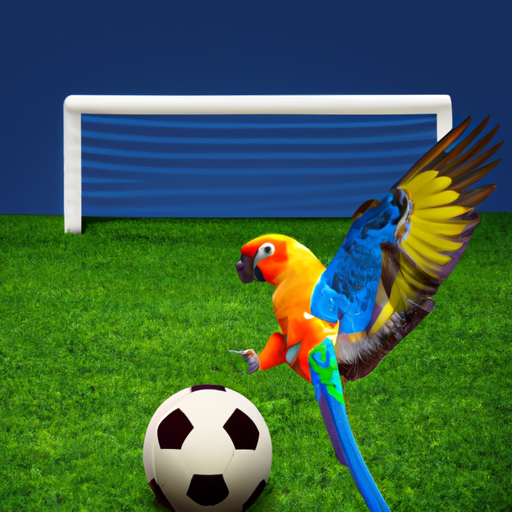

which can be used to retrieve the generated image of a parrot playing soccer.



In [29]:
show_output(output=output['output'])

## StableDiffusion 

In [31]:
tools = [SteamshipImageGenerationTool(model_name="stable-diffusion")]

In [33]:
mrkl = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)

In [35]:
output = mrkl.run("How would you visualize a parot playing soccer?")

/opt/anaconda3/lib/python3.11/site-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...
 I should use the generate_image tool to create an image of a parrot playing soccer.
Action: generate_image
Action Input: "A parrot wearing a soccer jersey, kicking a soccer ball on a green field with a soccer goal in the background."
Observation: 1FF2F405-7748-410A-9A61-AEA31C68A58C
Thought: I should use the UUID to access the generated image.
Action: Access generated image
Action Input: 1FF2F405-7748-410A-9A61-AEA31C68A58C
Observation: Access generated image is not a valid tool, try one of [generate_image].
Thought: I should use the generate_image tool to create an image of a parrot playing soccer.
Action: generate_image
Action Input: "A parrot wearing a soccer jersey, kicking a soccer ball on a green field with a soccer goal in the background."
Observation: 96FC2320-6C7C-4081-8B55-1F32764CF188
Thought: I should use the UUID to access the generated image.
Action: Access generated image
Action Input: 96FC2320-6C7C-4081-8B55-1F32764CF188
Observat

In [39]:
output

'The UUID of the generated image is 629B41B6-8385-40AC-8D24-1B3EA2D818E7.'

The UUID of the generated image is 



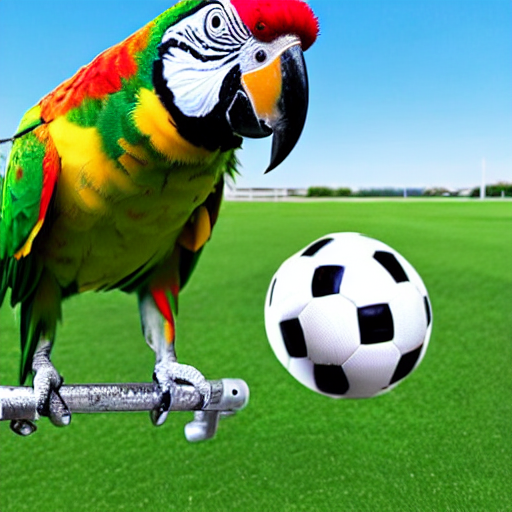

In [41]:
show_output(output=output)